In [9]:
import os
import sys
import pandas as pd
sys.path.append(os.path.abspath('../src'))
import pretraitements
import pickle
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import copy
# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

# pré-traitement des données et affichage de la shape
df = pd.read_csv(os.path.join(os.pardir, 'data', 'HAI817_Projet_train.csv'))
df['preprocessed_data'] = df['text'].apply(pretraitements.nettoyer_texte)

#vectorisation
X = vectorizer.fit_transform(df['preprocessed_data']).toarray()
y = df['our rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[104   9   0   1]
 [ 34  35   1   2]
 [ 15   5   3   0]
 [ 19  17   0   8]]
              precision    recall  f1-score   support

       false       0.60      0.91      0.73       114
     mixture       0.53      0.49      0.51        72
       other       0.75      0.13      0.22        23
        true       0.73      0.18      0.29        44

    accuracy                           0.59       253
   macro avg       0.65      0.43      0.44       253
weighted avg       0.62      0.59      0.54       253



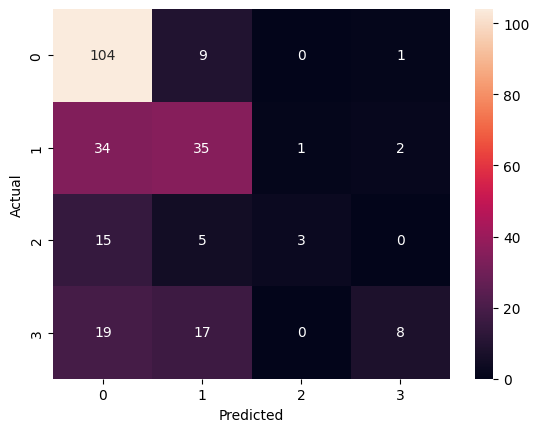

['abandoned' 'abbott' 'abele' ... 'youtube' 'zero' 'zone']
          Feature  Importance
4984         year    0.005993
1421    education    0.004718
994   coronavirus    0.004009
3903         said    0.003368
4032      service    0.003261
782       climate    0.003140
2506         last    0.003044
2463         kill    0.003038
360       average    0.002987
661         cause    0.002889
3188      patient    0.002831
1318       doctor    0.002606
3931          say    0.002606
3055          one    0.002600
3641       record    0.002541
614        cancer    0.002534
4952         work    0.002502
3218       people    0.002499
2686         many    0.002447
455         biden    0.002403


In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_importances = model.feature_importances_
features = vectorizer.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(20))